In [26]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import sys
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
# Looking at the columns
print("Columns:-> ", train.columns)
print("\nNumber of Columns: ", len(train.columns))
print("Number of Rows: ", len(train))

Columns:->  Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Number of Columns:  12
Number of Rows:  550068


In [29]:
# Looking at the Categorical variables
train.dtypes[train.dtypes == 'object'].index

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [30]:
#Looking at Numerical Variables
numerical_variables = train.dtypes.loc[train.dtypes  !='object'].index
print(numerical_variables)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [31]:
#Looking at first few rows
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
# Saving id variables to create final submission

ids_test = test['User_ID'].copy()
product_ids_test = test['Product_ID'].copy()

<h2>Univariate Analysis</h2>

In [33]:
#Analyzing Purchase Amount
train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

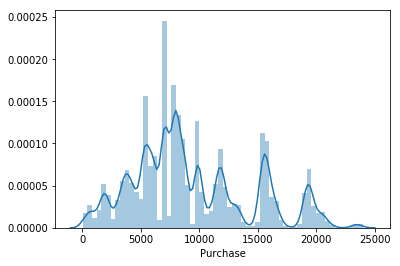

In [34]:
# --- Looking at the Distribution of 'SalePrice' ---
x=train['Purchase']
sns.distplot(x,kde=True,bins=60)

<p>We infer from the plot that.........</p>

In [35]:
# Skewness and Kurtosis
print("Skewness:", train['Purchase'].skew())
print("Kurtosis:", train['Purchase'].kurt())

Skewness: 0.600140003709
Kurtosis: -0.338377565585


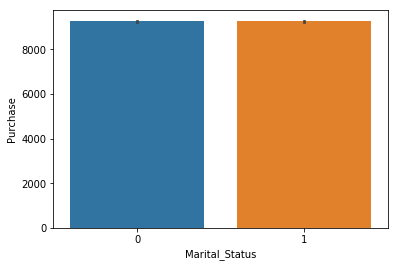

In [14]:
#Analyzing purchase with marital status
sns.barplot(x='Marital_Status',y='Purchase',data=train)

<p>Average value of purchase is same for male & female , So purchase doesnot depend on whether customer is married or not strongly</p>

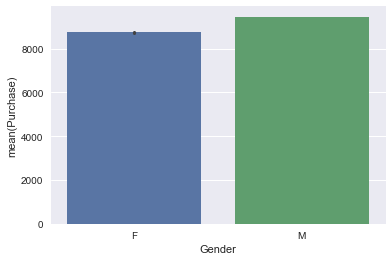

In [87]:
#Analyzing Purchase with Gender
sns.barplot(x='Gender',y='Purchase',data=train)

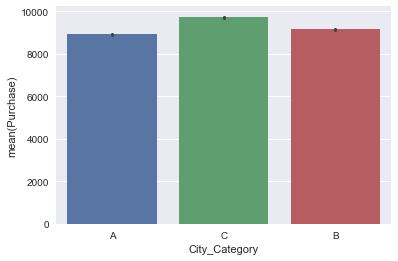

In [88]:
#Analyzing Purchase with City Type
sns.barplot(x='City_Category',y='Purchase',data=train)

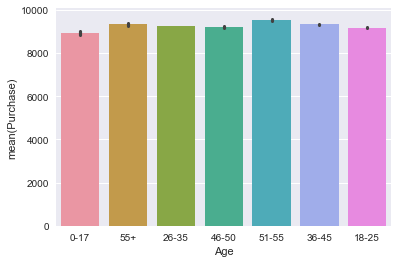

In [56]:
#Analyzing Purchase with Age
sns.barplot(x='Age',y='Purchase',data=train)

<p>Average value of purchase is same for all ages, it does not variate much ,So purchase doesnot depend on age strongly</p>

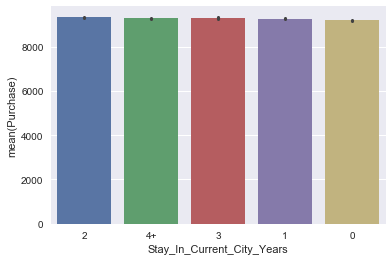

In [89]:
#Analysing Purchase with Stay_In_Current_City_Years
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=train)

<p>Average value of purchase is same for all No. of years staying in same city , it does not variate much ,So purchase doesnot depend on it strongly</p>

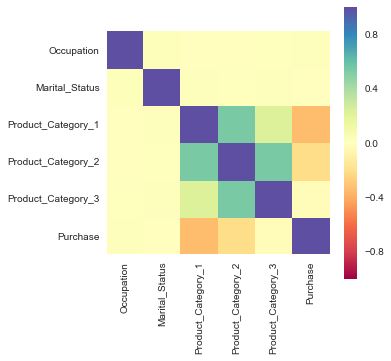

In [90]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,vmax=1,square=True,annot=False,cmap='Spectral')

In [59]:
cor_dict = corr['Purchase'].to_dict()
del cor_dict['Purchase']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

Product_Category_1: 	-0.34370334591857254
Product_Category_2: 	-0.20991848524374718
Product_Category_3: 	-0.022005725564366797
Occupation: 	0.020832616924618755
Marital_Status: 	-0.000463376419760025


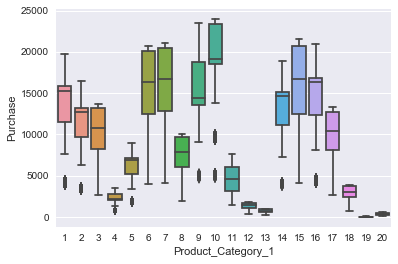

In [60]:
#Analyzing Purhcase with Product_Category_1
sns.boxplot(x="Product_Category_1", y="Purchase", data=train)

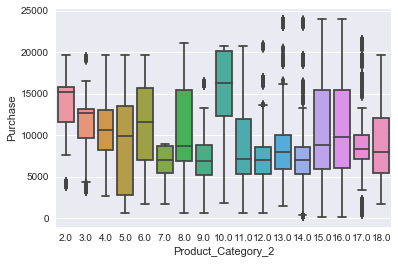

In [61]:
#Analyzing Purhcase with Product_Category_2
sns.boxplot(x="Product_Category_2", y="Purchase", data=train)

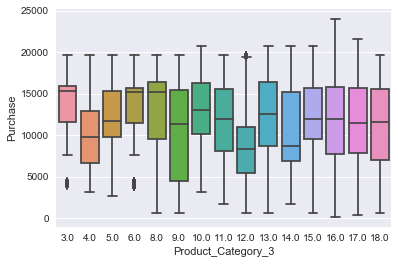

In [62]:
#Analyzing Purhcase with Product_Category_3
sns.boxplot(x="Product_Category_3", y="Purchase", data=train)

<h2>Missing Value Treatment</h2>

In [36]:
#######################################
# --- Missing Data with Percentages ---
#######################################

total = train.isnull().sum().sort_values(ascending=False)
percent = round(train.isnull().sum()/train.isnull().count() * 100, 2).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Product_Category_3,383247,69.67
Product_Category_2,173638,31.57
Purchase,0,0.00
Product_Category_1,0,0.00
Marital_Status,0,0.00
Stay_In_Current_City_Years,0,0.00
City_Category,0,0.00
Occupation,0,0.00
Age,0,0.00
Gender,0,0.00


In [37]:
### Dropping Prod_Cat2 and Prod_Cat3 (Because of High Percentage of Missing Values)

train.drop(['Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)
test.drop(['Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)

<h2>Outlier Detection & Removal</h2>

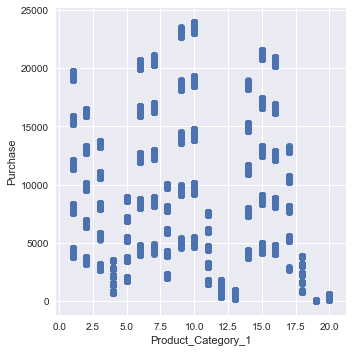

In [66]:
sns.lmplot(x="Product_Category_1", y="Purchase", data=train, fit_reg=False)

<p>No Outlier detected </p>

<h2>Variable Transformation</h2>

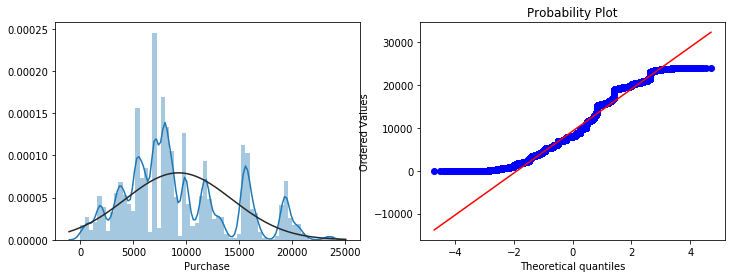

In [11]:
#Looking at the Distribution and Normal Probability Plot of 'Purchase'
x=train['Purchase']
f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(4)
f.set_figwidth(12)
sns.distplot(x, bins=60, fit=norm, ax=ax[0])
stats.probplot(x, plot=ax[1])
plt.show()

<p>Short Tails - An S shaped-curve indicates shorter than normal tails, i.e. less variance than expected.</p>

In [38]:
## converting age variable to numeric
train['Age'] = train['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}).astype(int)
test['Age'] = test['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}).astype(int)

In [39]:
# City to Numeric 
train['City_Category'] = train['City_Category'].map({'A':0, 'B':1, 'C':2}).astype(int)
test['City_Category'] = test['City_Category'].map({'A':0, 'B':1, 'C':2}).astype(int)

In [40]:
# Converting gender to numeric
train['Gender'] = train['Gender'].map({'F':0, 'M':1}).astype(int)
test['Gender'] = test['Gender'].map({'F':0, 'M':1}).astype(int)

In [41]:
# Converting Stay_In_Current_City_Years  to numeric
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4}).astype(int)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4}).astype(int)

In [42]:
# Label Encoding User_IDs
le = LabelEncoder()
train['User_ID'] = le.fit_transform(train['User_ID'])
test['User_ID'] = le.transform(test['User_ID'])

In [43]:
print("Train Set(Unique ID):", len(train.Product_ID.unique()))  # 3631 unique values in train - Product_ID

print("Test Set(Unique ID):", len(test.Product_ID.unique()))    # 3491 unique values in train - Product_ID

Train Set(Unique ID): 3631
Test Set(Unique ID): 3491


In [44]:
# New Product IDs which are in Test set But not in Train set

New_Product_IDs = list(set(test.Product_ID.unique()) - set(train.Product_ID.unique()))

In [45]:
# Label Encoding Product_IDs

le = LabelEncoder()

train['Product_ID'] = le.fit_transform(train['Product_ID'])               # Transform the Train Product_IDs

test.ix[test['Product_ID'].isin(New_Product_IDs), 'Product_ID'] = -1      # New Product_IDs in Test are set to -1
New_Product_IDs.append(-1)                                                # Append -1 to New_Product_IDs

test.ix[~test['Product_ID'].isin(New_Product_IDs), 'Product_ID'] = \
le.transform(test.ix[~test['Product_ID'].isin(New_Product_IDs), 'Product_ID'])  # Product_IDs in Test which are in Train
                                                                                # are transformed according to Train_Data

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [46]:
# Reducing boundaries to decrease RMSE

cutoff_purchase = np.percentile(train['Purchase'], 99.9)    # 99.9 percentile
train.ix[train['Purchase'] > cutoff_purchase, 'Purchase'] = cutoff_purchase

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


<h2>Feature Engineering

In [47]:
def getCount(compute_df,count_df,var_name):
    group_dict = dict(count_df[var_name].value_counts())
    count_list = [] #empty list
    for row in compute_df[var_name]:
        count_list.append(group_dict[row])
        
    return count_list

In [48]:
train["Age_count"] = getCount(train,train, "Age")
test["Age_count"] = getCount(test,train,"Age")

train["Occupation_Count"] = getCount(train,train, "Occupation")
test["Occupation_Count"] = getCount(test,train, "Occupation")

train["Product_Category_1_Count"] = getCount(train,train, "Product_Category_1")
test["Product_Category_1_Count"] = getCount(test,train, "Product_Category_1")

train["User_ID_Count"] = getCount(train,train, "User_ID")
test["User_ID_Count"] = getCount(test,train, "User_ID")


In [49]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Age_count,Occupation_Count,Product_Category_1_Count,User_ID_Count
0,0,672,0,0,10,0,2,0,3,8370.0,15102,12930,20213,35
1,0,2376,0,0,10,0,2,0,1,15200.0,15102,12930,140378,35
2,0,852,0,0,10,0,2,0,12,1422.0,15102,12930,3947,35
3,0,828,0,0,10,0,2,0,12,1057.0,15102,12930,3947,35
4,1,2734,1,6,16,2,4,0,8,7969.0,21504,25371,113925,77


In [50]:
def getPurchaseVar(compute_df, purchase_df, var_name):
    
    group = purchase_df.groupby(var_name)['Purchase']
    
    max_dict = dict(group.max())
    min_dict = dict(group.min())
    mean_dict = dict(group.mean())
    twentyfive_dict = dict(group.quantile(0.25))
    seventyfive_dict = dict(group.quantile(0.75))
        
    min_list = []
    max_list = []
    mean_list = []
    twentyfive_list = []
    seventyfive_list = []
        
    for row in compute_df[var_name]:

        min_list.append(min_dict.get(row))
        max_list.append(max_dict.get(row))
        mean_list.append(mean_dict.get(row))
        twentyfive_list.append(twentyfive_dict.get(row))
        seventyfive_list.append(seventyfive_dict.get(row))

    return min_list, max_list, mean_list, twentyfive_list, seventyfive_list

In [51]:
# User_ID

min_price_list, max_price_list, mean_price_list, twentyfive_price_list, seventyfive_price_list =\
getPurchaseVar(train,train, "User_ID")
        
train["User_ID_MinPrice"] = min_price_list
train["User_ID_MaxPrice"] = max_price_list
train["User_ID_MeanPrice"] = mean_price_list
train["User_ID_25PercPrice"] = twentyfive_price_list
train["User_ID_75PercPrice"] = seventyfive_price_list


min_price_list, max_price_list, mean_price_list, twentyfive_price_list, seventyfive_price_list = \
getPurchaseVar(test, train, "User_ID")

test["User_ID_MinPrice"] = min_price_list
test["User_ID_MaxPrice"] = max_price_list
test["User_ID_MeanPrice"] = mean_price_list
test["User_ID_25PercPrice"] = twentyfive_price_list
test["User_ID_75PercPrice"] = seventyfive_price_list

In [52]:
# Product_ID

min_price_list, max_price_list, mean_price_list, twentyfive_price_list, seventyfive_price_list = \
getPurchaseVar(train,train, "Product_ID")

train["Product_ID_MinPrice"] = min_price_list
train["Product_ID_MaxPrice"] = max_price_list
train["Product_ID_MeanPrice"] = mean_price_list
train["Product_ID_25PercPrice"] = twentyfive_price_list
train["Product_ID_75PercPrice"] = seventyfive_price_list


min_price_list, max_price_list, mean_price_list, twentyfive_price_list, seventyfive_price_list = \
getPurchaseVar(test,train, "Product_ID")

test["Product_ID_MinPrice"] = min_price_list
test["Product_ID_MaxPrice"] = max_price_list
test["Product_ID_MeanPrice"] = mean_price_list
test["Product_ID_25PercPrice"] = twentyfive_price_list
test["Product_ID_75PercPrice"] = seventyfive_price_list

In [53]:
# Product_Category_1

min_price_list, max_price_list, mean_price_list, twentyfive_price_list, seventyfive_price_list = \
getPurchaseVar(train,train, "Product_Category_1")

train["Product_Category_1_MinPrice"] = min_price_list
train["Product_Category_1_MaxPrice"] = max_price_list
train["Product_Category_1_MeanPrice"] = mean_price_list
train["Product_Category_1_25PercPrice"] = twentyfive_price_list
train["Product_Category_1_75PercPrice"] = seventyfive_price_list


min_price_list, max_price_list, mean_price_list, twentyfive_price_list, seventyfive_price_list = \
getPurchaseVar(test,train, "Product_Category_1")

test["Product_Category_1_MinPrice"] = min_price_list
test["Product_Category_1_MaxPrice"] = max_price_list
test["Product_Category_1_MeanPrice"] = mean_price_list
test["Product_Category_1_25PercPrice"] = twentyfive_price_list
test["Product_Category_1_75PercPrice"] = seventyfive_price_list

In [54]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,...,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,Product_ID_25PercPrice,Product_ID_75PercPrice,Product_Category_1_MinPrice,Product_Category_1_MaxPrice,Product_Category_1_MeanPrice,Product_Category_1_25PercPrice,Product_Category_1_75PercPrice
0,0,672,0,0,10,0,2,0,3,8370.0,...,2648.0,13716.0,11870.863436,10804.00,13475.50,2638.0,13717.0,10096.705734,8198.0,13211.0
1,0,2376,0,0,10,0,2,0,1,15200.0,...,3880.0,19701.0,16304.030981,15312.00,19264.00,3790.0,19708.0,13606.218596,11546.0,15812.0
2,0,852,0,0,10,0,2,0,12,1422.0,...,343.0,1776.0,1237.892157,1043.75,1423.75,342.0,1778.0,1350.859894,1071.0,1723.0
3,0,828,0,0,10,0,2,0,12,1057.0,...,365.0,1778.0,1455.140762,1378.00,1736.00,342.0,1778.0,1350.859894,1071.0,1723.0
4,1,2734,1,6,16,2,4,0,8,7969.0,...,3920.0,10073.0,7692.763547,6174.50,8082.50,1939.0,10082.0,7498.958078,6036.0,9722.0


In [55]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Age_count,...,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,Product_ID_25PercPrice,Product_ID_75PercPrice,Product_Category_1_MinPrice,Product_Category_1_MaxPrice,Product_Category_1_MeanPrice,Product_Category_1_25PercPrice,Product_Category_1_75PercPrice
0,3,1196,1,4,7,1,2,1,1,45701,...,3933.0,19708.0,15781.118590,12067.50,19248.50,3790.0,19708.0,13606.218596,11546.0,15812.0
1,8,1043,1,2,17,2,0,0,3,219587,...,3077.0,13714.0,11746.665354,10731.25,13493.25,2638.0,13717.0,10096.705734,8198.0,13211.0
2,9,2764,0,3,1,1,4,1,5,110013,...,1734.0,8900.0,5731.338028,5147.00,7027.00,1713.0,8907.0,6240.088178,5242.0,7156.0
3,9,1358,0,3,1,1,4,1,4,110013,...,813.0,3526.0,1943.266667,1459.00,2129.50,684.0,3556.0,2329.659491,2058.0,2837.0
4,10,529,0,2,1,2,1,0,4,219587,...,684.0,3556.0,2585.590829,2115.00,3421.50,684.0,3556.0,2329.659491,2058.0,2837.0


In [36]:
train.to_csv('train_feature.csv',index=False)
test.to_csv('test_feature.csv',index=False)

<h2>Modelling</h2>

In [64]:
!pip install xgboost

  Using cached xgboost-0.6a2.tar.gz
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/5e/c1/d6/522af54e5cc001fad4dd855117f8bf61b11d56443e06672e26
Successfully built xgboost


In [100]:
#Labelling dataset
X = train[:]
y = train['Purchase']

# Dropping Purchase from Feature Matrix i.e train data which is now stored in X
X.drop(["Purchase"], axis=1, inplace=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [101]:
import xgboost as xgb
dtrain = xgb.DMatrix(X.values, label = y, missing=np.nan)

param = {'objective': 'reg:linear', 'booster': 'gbtree', 'silent': 1,
         'max_depth': 10, 'eta': 0.1, 'nthread': 4,
         'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 20,
         'max_delta_step': 0, 'gamma': 0}

num_round = 690

In [102]:
seeds = [1122, 2244, 3366, 4488, 5500]
y_pred = np.zeros((len(test), len(seeds)))

In [103]:
for run in range(len(seeds)):
    sys.stdout.write("\rXGB RUN:{}/{}".format(run+1, len(seeds)))
    sys.stdout.flush()
    param['seed'] = seeds[run]
    clf = xgb.train(param, dtrain, num_round)
    dtest = xgb.DMatrix(test.values, missing=np.nan)
    y_pred[:, run] = clf.predict(dtest)

XGB RUN:5/5

In [104]:
y_pred = np.mean(y_pred, axis=1)

In [105]:
# Submission file

submit = pd.DataFrame({'User_ID': ids_test, 'Product_ID': product_ids_test, 'Purchase': y_pred})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

In [106]:
submit.ix[submit['Purchase'] < 0, 'Purchase'] = 12  # changing min prediction to min value in train
submit.to_csv("final_solution.csv", index=False)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [98]:
#Labelling dataset
X = train[:]
y = train['Purchase']

# Dropping Purchase from Feature Matrix i.e train data which is now stored in X
X.drop(["Purchase"], axis=1, inplace=True)

# Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [271]:
import xgboost

In [99]:
#Fitting XGBoost to train 
from xgboost import XGBRegressor
regressor = XGBRegressor()

regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [100]:
# Predicting the Test set results
y_pred = regressor.predict(test)


In [101]:
# Submission file

submit = pd.DataFrame({'User_ID': ids_test, 'Product_ID': product_ids_test, 'Purchase': y_pred})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

In [102]:
submit.ix[submit['Purchase'] < 0, 'Purchase'] = 12  # changing min prediction to min value in train
submit.to_csv("final_solution.csv", index=False)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
